In [229]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

# Part 1

### Call the sf_temps() dataset from the vega_datasets library like so:
data.sf_temps()

In [2]:
# getting data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
# checking data types
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [13]:
# setting index to date
df = df.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [11]:
# getting the average daily temperatures
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

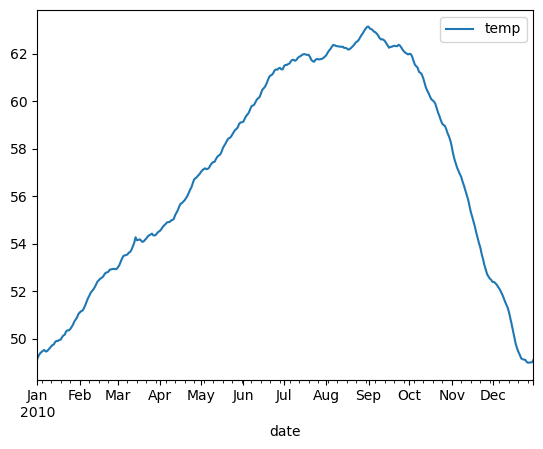

In [12]:
# getting the visuals for avg daily temp over time
df.resample('D').mean().plot()

### Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

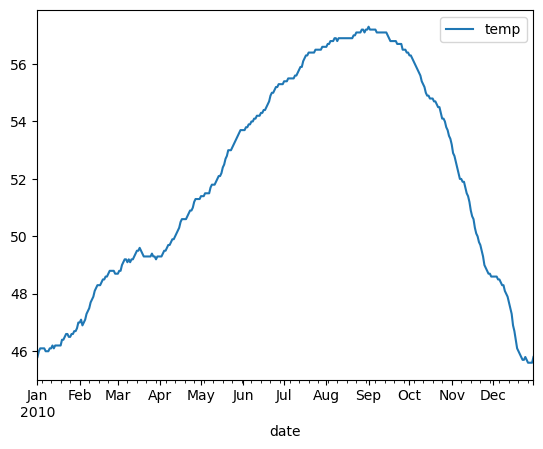

In [20]:
# getting the minimum temperature per day and plotting
df.resample('D').min().plot()

### Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

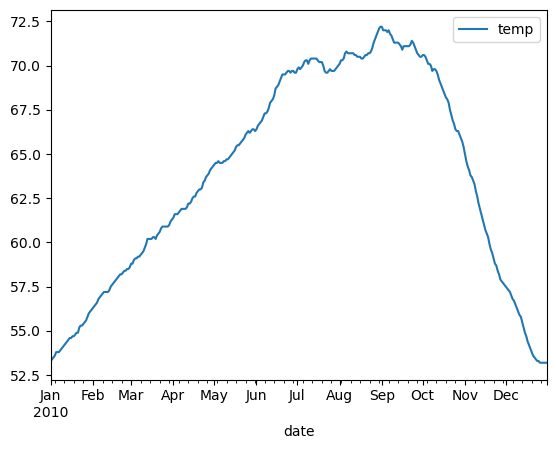

In [21]:
# resmapling by the day and getting the maximum temp for each day and visualising
df.resample('D').max().plot()

### Which month is the coldest, on average?

In [31]:
# january
df.resample('M').mean()[df.resample('M').mean() == df.resample('M').mean().min()]

,temp
date,
2010-01-31,49.98414
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


### Which month has the highest average temperature?

In [32]:
# september has the higghest average temp
df.resample('M').mean()[df.resample('M').mean() == df.resample('M').mean().max()]

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,62.487083


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [37]:
# getting average min and max temp and creating a new df with this info
new_df = df.resample('M').agg(['min', 'max'])
new_df.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [50]:
# creating new column with variability in it
new_df['variability'] = abs(new_df[('temp', 'min')] - new_df[('temp', 'max')])

In [53]:
# october
new_df['variability'].max() == new_df['variability']

date
2010-01-31    False
2010-02-28    False
2010-03-31    False
2010-04-30    False
2010-05-31    False
2010-06-30    False
2010-07-31    False
2010-08-31    False
2010-09-30    False
2010-10-31     True
2010-11-30    False
2010-12-31    False
Freq: M, Name: variability, dtype: bool

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

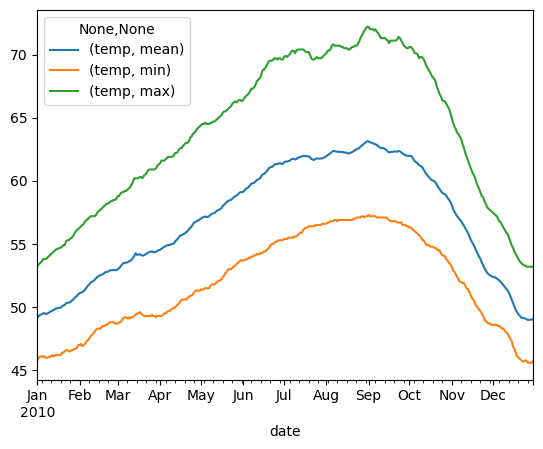

In [57]:
# reampling and creating a plot
df.resample('D').agg(['mean', 'min', 'max']).plot()

# Part 2

In [83]:
# geting data and inspecting
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [62]:
# checking dtypes
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

### Which year and month combination has the highest amount of precipitation?

In [65]:
# setting the year and mponth as separate columns
# df['year'], df['month'] = df.date.dt.year, df.date.dt.month

In [75]:
# checking
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [84]:
# resetting the index to the date
df = df.set_index('date')

In [85]:
# trying to resample by the month and seeing
by_month = df.resample('M').mean()

In [87]:
# December of 2015 had the highest precipitation
by_month[by_month['precipitation'] == by_month['precipitation'].max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


### Visualize the amount of monthly precipitation over time.

Text(0, 0.5, 'Precipitation (inches)')

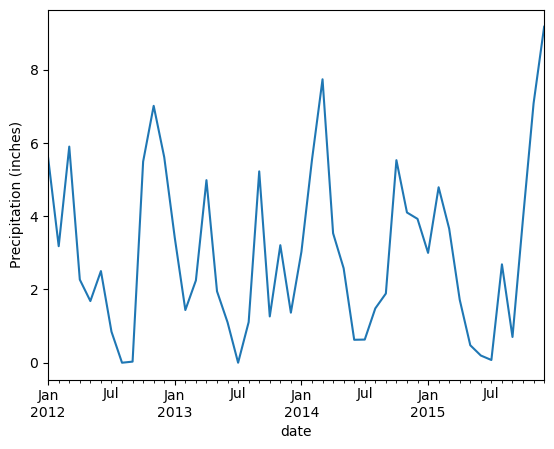

In [90]:
# getting plot of preciupitation
by_month['precipitation'].plot()
plt.ylabel('Precipitation (inches)')

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [92]:
# getting daily averages
by_day = df.resample('D').mean()

In [96]:
# CHECKING
by_day.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1


<AxesSubplot:xlabel='date'>

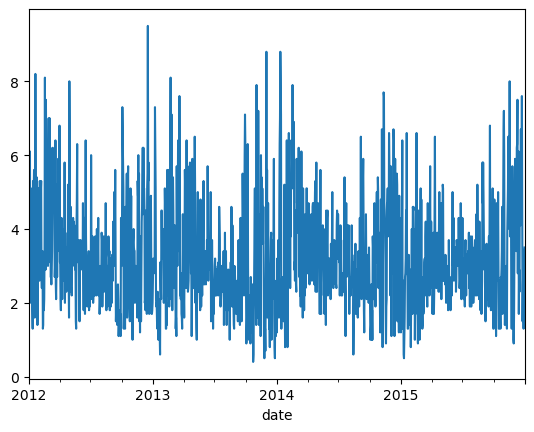

In [98]:
# plottin wind by day over time
by_day.wind.plot()

<AxesSubplot:xlabel='date'>

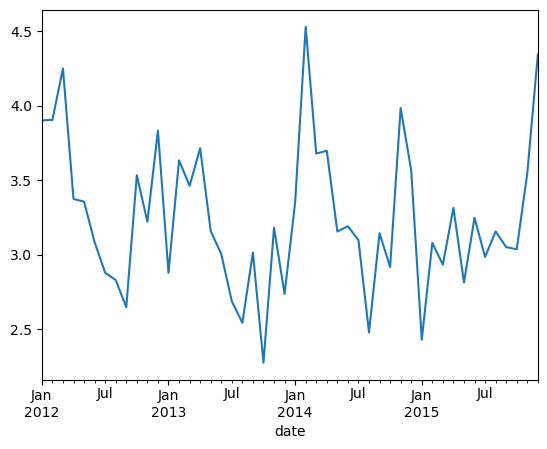

In [99]:
# that was too messy so I will use the by_month intead
by_month.wind.plot()

### Which year-month combination is the windiest?

In [102]:
# feb of 2-14 was the windiest
by_month[by_month.wind == by_month.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [104]:
# cheacking the df
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [116]:
# I need to separate by year then have pandas count the number of sunny days
# 2014 had the sunniest number of days
pd.concat([df, pd.get_dummies(df.weather)], axis=1).resample('Y').mean()

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
date,,,,,,,,,
2012-12-31,3.349727,15.276776,7.289617,3.400820,0.084699,0.013661,0.521858,0.057377,0.322404
2013-12-31,2.268493,16.058904,8.153973,3.015890,0.043836,0.224658,0.164384,0.005479,0.561644
2014-12-31,3.377534,16.995890,8.662466,3.387671,0.000000,0.413699,0.008219,0.000000,0.578082
2015-12-31,3.121096,17.427945,8.835616,3.159726,0.019178,0.473973,0.013699,0.000000,0.493151


### In which month does it rain the most?

In [122]:
# getting new df with encoded variables
new_df = pd.concat([df, pd.get_dummies(df.weather)], axis=1)

In [134]:
# ceraing a month columsn
new_df['month'] = new_df.index.month

In [135]:
# feb has the most rain
new_df.groupby('month').mean().rain == new_df.groupby('month').mean().rain.max()

month
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: rain, dtype: bool

### Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
new_df[]

In [151]:
# december
new_df[new_df.precipitation > 0].groupby('month').count().max() == new_df[new_df.precipitation > 0].groupby('month').count()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
month,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


# Part 3

In [181]:
# getting data
df = data.flights_20k()

In [154]:
# setting index to date
# df = df.set_index('date')

### Convert any negative delays to 0.

In [182]:
# turning negatices to 0
df.delay[df['delay'] < 0] = 0
df

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_2967/3666170159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.delay[df['delay'] < 0] = 0


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### Which hour of the day has the highest average delay?

In [185]:
# setting the hour
df['hour'] = df.date.dt.hour

In [188]:
# getting the highest avg delay per hour
df.groupby('hour').mean() == df.groupby('hour').mean().max()

# 3am

,delay,distance
hour,,
0,False,False
1,False,False
3,True,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True
10,False,False


### Does the day of the week make a difference in the delay amount?

In [196]:
# creating weekday names column
df['day_name'] = df.date.dt.day_name()

In [199]:
# yes, may do a stats test to prove it
df.groupby('day_name').mean()

,delay,distance,hour
day_name,,,
Friday,17.757596,501.118230,13.667107
Monday,7.165772,505.032215,13.454362
Saturday,8.431498,550.889031,13.010670
Sunday,10.413542,507.987758,14.236419
Thursday,12.821322,485.175025,13.619728
Tuesday,9.410866,496.021732,13.397963
Wednesday,11.032478,501.009094,13.588828


### Does the month make a difference in the delay amount?

In [202]:
# creating month name column
df['month_name'] = df.date.dt.month_name()

In [205]:
# yes
df.groupby('month_name').mean()

,delay,distance,hour
month_name,,,
February,12.306106,511.156170,13.644182
January,11.301592,500.391952,13.552771
March,9.875287,504.712069,13.531897


# Bonus

In [206]:
# getting data
df = data.iowa_electricity()

In [207]:
# inspecting
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


### For each row, calculate the percentage of the year's total that energy source provided.

In [215]:
# checking the year values
df.year.value_counts()

2001-01-01    3
2010-01-01    3
2016-01-01    3
2015-01-01    3
2014-01-01    3
2013-01-01    3
2012-01-01    3
2011-01-01    3
2009-01-01    3
2002-01-01    3
2008-01-01    3
2007-01-01    3
2006-01-01    3
2005-01-01    3
2004-01-01    3
2003-01-01    3
2017-01-01    3
Name: year, dtype: int64

In [221]:
# calculating the percentage, but in decimal form
df['perc_total_energy'] = df.net_generation / df.net_generation.sum()

In [222]:
df.head()

,year,source,net_generation,perc_total_energy
0,2001-01-01,Fossil Fuels,35361,0.040906
1,2002-01-01,Fossil Fuels,35991,0.041634
2,2003-01-01,Fossil Fuels,36234,0.041916
3,2004-01-01,Fossil Fuels,36205,0.041882
4,2005-01-01,Fossil Fuels,36883,0.042666


### Lineplot of generation over time, color by source

<AxesSubplot:xlabel='year', ylabel='net_generation'>

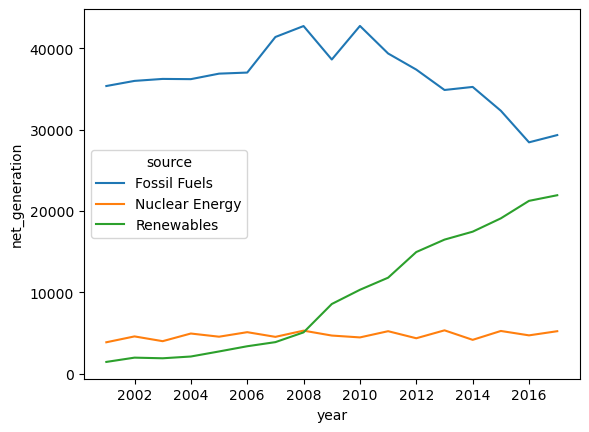

In [234]:
sns.lineplot(df['year'],df['net_generation'], hue=df.source)

### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [238]:
df.drop(columns='perc_total_energy').pivot_table(index='source', columns='year')

net_generation                                              \
year               2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                      
Fossil Fuels            35361      35991      36234      36205      36883   
Nuclear Energy           3853       4574       3988       4929       4538   
Renewables               1437       1963       1885       2102       2724   

                                                                       \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01   
source                                                                  
Fossil Fuels        37014      41389      42734      38620      42750   
Nuclear Energy       5095       4519       5282       4679       4451   
Renewables           3364       3870       5070       8560      10308   

                                                                       \
year           2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01   
source                                                                  
Fossil Fuels        39361      37379      34873      35250      32319   
Nuclear Energy       5215       4347       5321       4152       5243   
Renewables          11795      14949      16476      17452      19091   

                                      
year           2016-01-01 2017-01-01  
source                                
Fossil Fuels        28437      29329  
Nuclear Energy       4703       5214  
Renewables          21241      21933

### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [255]:
# creating cumulative net generation column
# df.drop(columns='cumulative_generation', inplace=True)
df['cumulative_generation'] = df.groupby('source').transform(lambda x: x.cumsum()).net_generation

In [257]:
df.sample(5)

,year,source,net_generation,perc_total_energy,cumulative_generation
42,2009-01-01,Renewables,8560,0.009902,30975
25,2009-01-01,Nuclear Energy,4679,0.005413,41457
41,2008-01-01,Renewables,5070,0.005865,22415
0,2001-01-01,Fossil Fuels,35361,0.040906,35361
20,2004-01-01,Nuclear Energy,4929,0.005702,17344


<AxesSubplot:xlabel='year', ylabel='cumulative_generation'>

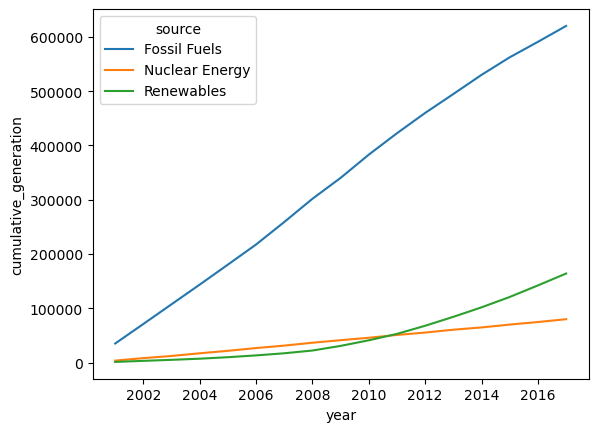

In [259]:
sns.lineplot(data=df, x='year',y='cumulative_generation', hue=df.source)

### Is the total generation increasing over time?

Yes

### How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total

In [ ]:
# create multiple graphs based on the years consumption

# Bonus 2

### Use the sf_temps dataset

In [261]:
df = data.sf_temps()

In [262]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [265]:
# checking mins and maxes of the data
df.temp.describe()

count    8759.000000
mean       56.924112
std         6.107079
min        45.600000
25%        52.300000
50%        56.500000
75%        60.700000
max        72.200000
Name: temp, dtype: float64

In [267]:
# creating categories
df['temp_cat'] = pd.cut(df['temp'], bins=[45, 52, 56, 60, 73], labels = ['cold', 'cool', 'warm', 'hot'])

### How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [278]:
# getting visual of this representation
pd.crosstab(index=df['temp_cat'], columns=df.date.dt.month)

date,1,2,3,4,5,6,7,8,9,10,11,12
temp_cat,,,,,,,,,,,,
cold,543,340,283,192,30,0,0,0,0,0,166,513
cool,198,215,241,230,313,198,41,0,0,162,277,200
warm,3,117,173,132,134,188,331,356,322,260,186,31
hot,0,0,46,166,267,334,372,388,398,322,91,0


In [287]:
# creating new columns for month number
df['month'] = df.date.dt.month
# df['month_name'] = df.

Text(0.5, 1.0, 'Temperature Change Over Months')

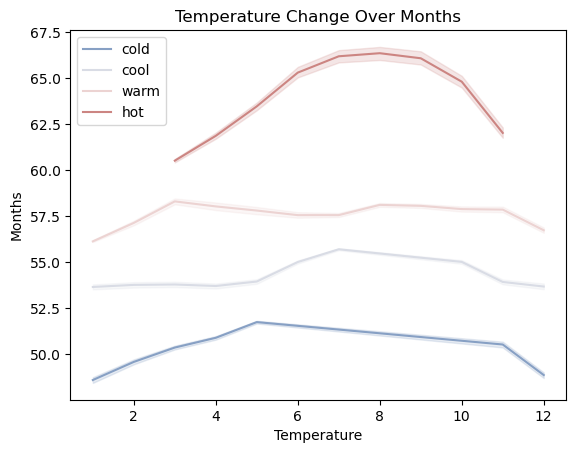

In [300]:
# creating a graph with the colors
sns.lineplot(data=df, x='month', y='temp', palette='vlag', hue='temp_cat')
plt.legend()
plt.ylabel('Months')
plt.xlabel('Temperature')
plt.title('Temperature Change Over Months')

### Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [310]:
df['day'] = df.date.dt.day

In [312]:
df = df.set_index('date')

In [313]:
df['days_in_month'] = df.groupby('month').day.max()

In [316]:
df = df.drop(columns=['days_in_month', 'days_in_moonth'])

In [317]:
# im thinking there will be subplots that show each year and in each year there will be 4 bins for
# i'll try one first

<AxesSubplot:xlabel='month', ylabel='day'>

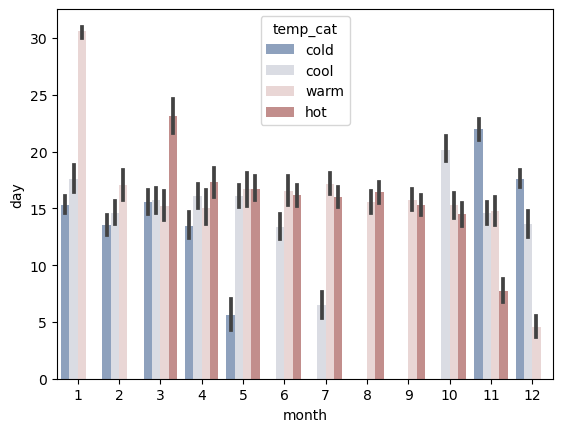

In [322]:
sns.barplot(data=df, x='month', y='day', palette='vlag', hue='temp_cat')